Epoch 1/30


/Users/mikeshinoda/Library/Caches/pypoetry/virtualenvs/ai-algo-ozOH1ZQc-py3.12/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:731: UserWarning: Gradients do not exist for variables ['kernel', 'bias', 'kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0107
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8934e-04
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8602e-05
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0875e-05
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3245e-06
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7230e-06
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9896e-06
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1747e-06
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2391e-06
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2945e-06
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2740e-06
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4655e-06
Epoch 13/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0726e-06
Epoch 14/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3192e-06
Epoch 15/30
469/

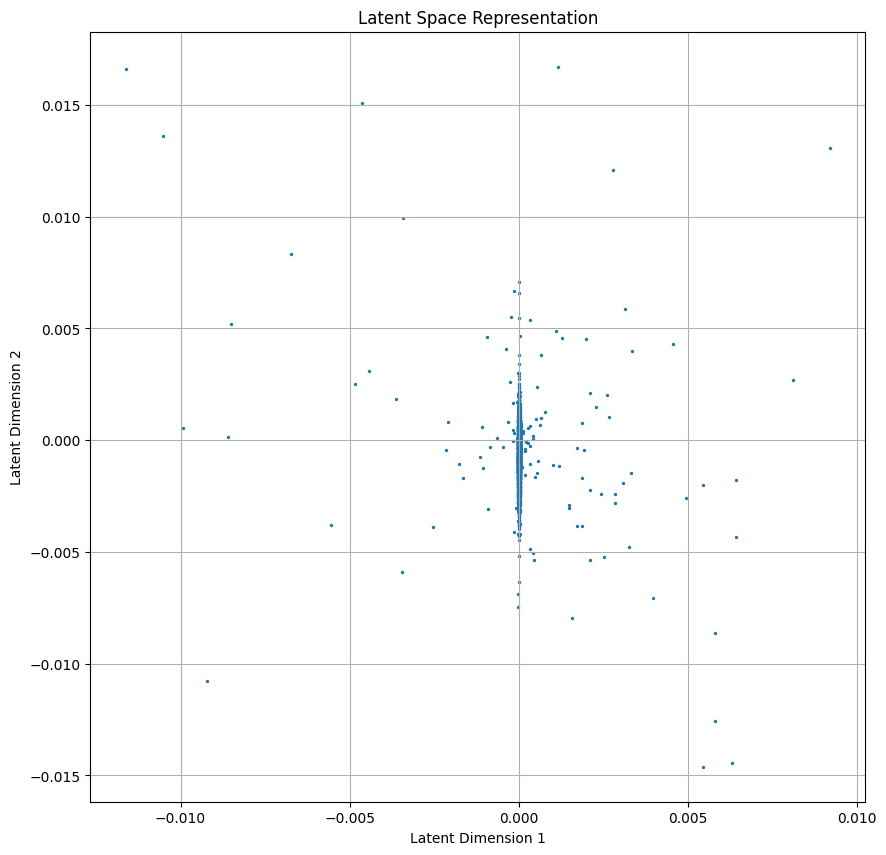

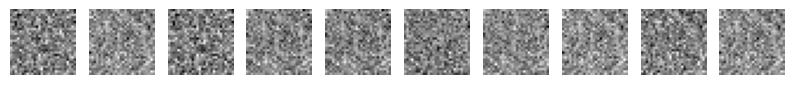

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# 定义采样函数
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon


# 定义VAE模型
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = sampling((z_mean, z_log_var))
        reconstructed = self.decoder(z)
        kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
        self.add_loss(kl_loss)
        return reconstructed


# 构建编码器
def build_encoder(latent_dim):
    encoder_inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Flatten()(encoder_inputs)
    x = layers.Dense(256, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)
    return keras.Model(encoder_inputs, [z_mean, z_log_var], name='encoder')


# 构建解码器
def build_decoder(latent_dim):
    decoder_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(256, activation='relu')(decoder_inputs)
    x = layers.Dense(28 * 28, activation='sigmoid')(x)
    x = layers.Reshape((28, 28, 1))(x)
    return keras.Model(decoder_inputs, x, name='decoder')


# 设置超参数
latent_dim = 2  # 潜在空间维度

# 构建模型
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)
vae = VAE(encoder, decoder)

# 编译模型
vae.compile(optimizer=keras.optimizers.Adam())

# 加载MNIST数据集
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, -1).astype('float32') / 255.0

# 训练模型
vae.fit(x_train, x_train, epochs=30, batch_size=128)


# 可视化生成的图像
def plot_latent_space(vae, n=30, figsize=10):
    z_mean, _ = vae.encoder.predict(x_test)
    plt.figure(figsize=(figsize, figsize))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], s=2)
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.title("Latent Space Representation")
    plt.grid()


plot_latent_space(vae)


# 生成新图像
def generate_images(vae, n=10):
    z_sample = np.random.normal(size=(n, latent_dim))
    generated_images = vae.decoder.predict(z_sample)
    plt.figure(figsize=(n, 1))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()


generate_images(vae)
